In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import pandas as pd
import numpy as np
from nltk.corpus import wordnet as wn
import gensim 
from gensim.models import Word2Vec 
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [32]:
from nltk.corpus import stopwords
breakers = {'with', 'without', 'comma', 'and', 'or', 'by', 'in', 'due', 'to', 'of', 'causing'}
stop_words= (set(stopwords.words("english")) | {'nan', 'unspecified', 'stated', 'other', 'state'}) - breakers

In [34]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [58]:
from sklearn.preprocessing import OneHotEncoder
>>> enc = OneHotEncoder()

In [35]:
df_train = np.asarray(pd.read_csv("data/diabetes/diab_train.csv", skiprows=1, header=None))
df_val = np.asarray(pd.read_csv("data/diabetes/diab_validation.csv", skiprows=1, header=None))
df_test = np.asarray(pd.read_csv("data/diabetes/diab_test.csv", skiprows=1, header=None))

In [36]:
X = np.hstack([df_train[:,:-4], df_train[:,-3:]])
X_val = np.hstack([df_val[:,:-4], df_val[:,-3:]])
X_test = np.hstack([df_test[:,:-4], df_test[:,-3:]])
Y = df_train[:,-4]
Y_val = df_val[:,-4]
Y_test = df_test[:,-4]

In [37]:
def diff(corpus, sample):
    return np.linalg.norm(corpus-sample, axis=1)

In [38]:
def sanitize(doc):
    return ' '.join([lem.lemmatize(w) for w in tokenizer.tokenize(str(doc).replace(",", " comma").lower()) if w not in stop_words])

In [69]:
diagnoses = []

for x in X[:, -3:]:
    for i in range(x.size):
        diagnoses.append([sanitize(x[i])])
        
for x in X_val[:, -3:]:
    for i in range(x.size):
        diagnoses.append([sanitize(x[i])])
        
for x in X_test[:, -3:]:
    for i in range(x.size):
        diagnoses.append([sanitize(x[i])])

In [40]:
readmissions = {}
for i, d in enumerate(X[:, -3]):
    d = sanitize(d)
    if d in readmissions:
        readmissions[d].append(Y[i])
    else:
        readmissions[d] = [Y[i]]

In [41]:
readmissions = list((k, np.asarray(v).mean(), np.asarray(v).std(), len(v)) for k, v in readmissions.items())

In [42]:
sorted(readmissions)

[('', 0.0, 0.0, 1),
 ('abdominal pain comma site', 0.5, 0.5, 28),
 ('abdominal pregnancy without intrauterine pregnancy', 0.0, 0.0, 1),
 ('abnormal function study of brain and central nervous system comma',
  0.0,
  0.0,
  1),
 ('abnormal involuntary movement', 0.0, 0.0, 6),
 ('abrasion or friction burn of elbow comma forearm comma and wrist comma without mention of infection',
  0.0,
  0.0,
  1),
 ('abscess of anal and rectal region',
  0.3333333333333333,
  0.4714045207910317,
  6),
 ('abscess of liver', 0.35714285714285715, 0.47915742374995485, 14),
 ('abscess of lung', 0.0, 0.0, 1),
 ('absence of menstruation', 0.0, 0.0, 3),
 ('achalasia and cardiospasm', 0.3870967741935484, 0.487086092598113, 31),
 ('achlorhydria', 0.4, 0.48989794855663565, 5),
 ('acne varioliformis', 1.0, 0.0, 1),
 ('acquired deformity of nose', 0.3333333333333333, 0.4714045207910317, 3),
 ('acquired hypertrophic pyloric stenosis', 0.625, 0.4841229182759271, 8),
 ('acromegaly and gigantism', 1.0, 0.0, 2),
 ('acut

In [43]:
conditions = []
withs = []
withouts = []
commas = []
ands = []
ors = []
bys = []
ins = []
duetos = []
ofs = []
tos = []
causings = []

for diag in diagnoses:
    temp = ""
    diag = diag.split()
    for i in range(len(diag)):
        w = diag[len(diag)-1-i]
        if w == 'with':
            withs.append(temp)
            temp = ""
        elif w == 'without':
            withouts.append(temp)
            temp = ""
        elif w == 'comma':
            commas.append(temp)
            temp = ""
        elif w == 'and':
            ands.append(temp)
            temp = ""
        elif w == 'or':
            ors.append(temp)
            temp = ""
        elif w == 'by':
            bys.append(temp)
            temp = ""
        elif w == 'in':
            ins.append(temp)
            temp = ""
        elif w == 'due':
            duetos.append(temp)
            temp = ""
        elif w == 'of':
            ofs.append(temp)
            temp = ""
        elif w == 'to':
            tos.append(temp)
            temp = ""
        elif w == 'causing':
            causings.append(temp)
            temp = ""
        else: temp = w + " " + temp
        
        if i == len(diag)-1:
            conditions.append(temp)
            temp = ""

In [56]:
sorted(list(set(commas)))

['',
 'acquired ',
 'adult ',
 'aggressive type ',
 'antipyretic ',
 'cause ',
 'cerebrovascular disease ',
 'childbirth ',
 'closed ',
 'cognitive deficit ',
 'complete ',
 'complicating pregnancy ',
 'current ',
 'elsewhere classified ',
 'enteritis ',
 'epididymitis ',
 'episode ',
 'except isthmus ',
 'except lobe ',
 'except mandible ',
 'except pelvis ',
 'excluding finger ',
 'extranodal ',
 'eye ',
 'face ',
 'female ',
 'forearm ',
 'generalized ',
 'ill defined ',
 'impairment level specified ',
 'implant ',
 'infiltrative ',
 'injuring driver ',
 'injury ',
 'intra abdominal organ ',
 'leg ',
 'level ',
 'malignant ',
 'native ',
 'neck ',
 'nonobliterative ',
 'oral cavity ',
 'organism ',
 'otherwise specified ',
 'part ',
 'presenting hazard ',
 'primary ',
 'reason ',
 'region ',
 'scalp ',
 'secondary ',
 'single liveborn ',
 'single manic episode ',
 'site ',
 'site specified ',
 'specified acute ',
 'specified simple ',
 'streptococcus ',
 'thigh ',
 'type ii ',
 'typ

In [160]:
sorted(set(X[:,-3].astype(str))|set(X[:,-2].astype(str))|set(X[:,-1].astype(str)))

['Abdominal pain, unspecified site',
 'Abdominal pregnancy without intrauterine pregnancy',
 'Abnormal function study of brain and central nervous system, unspecified',
 'Abnormal involuntary movements',
 'Abrasion or friction burn of elbow, forearm, and wrist, without mention of infection',
 'Abrasion or friction burn of face, neck, and scalp except eye, without mention of infection',
 'Abrasion or friction burn of finger(s), without mention of infection',
 'Abscess of anal and rectal regions',
 'Abscess of liver',
 'Abscess of lung',
 'Absence of menstruation',
 'Accidental fall from playground equipment',
 'Accidental fall on or from escalator',
 'Achalasia and cardiospasm',
 'Achlorhydria',
 'Acne varioliformis',
 'Acquired deformity of nose',
 'Acquired hypertrophic pyloric stenosis',
 'Acromegaly and gigantism',
 'Acromioclavicular (joint) (ligament) sprain',
 'Acute alcoholic intoxication in alcoholism, unspecified',
 'Acute and subacute bacterial endocarditis',
 'Acute appendic

In [70]:
enc.fit(diagnoses)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [75]:
X_enc = []
for x in X[:,-3:]:
    e = np.zeros(628)
    for i in range(len(x)):
        e += enc.transform([[sanitize(x[i])]]).toarray()[0]
    X_enc.append(e)
X_enc = np.asarray(X_enc)

In [76]:
X_val_enc = []
for x in X_val[:,-3:]:
    e = np.zeros(628)
    for i in range(len(x)):
        e += enc.transform([[sanitize(x[i])]]).toarray()[0]
    X_val_enc.append(e)
X_val_enc = np.asarray(X_val_enc)

In [79]:
X_test_enc = []
for x in X_test[:,-3:]:
    e = np.zeros(628)
    for i in range(len(x)):
        e += enc.transform([[sanitize(x[i])]]).toarray()[0]
    X_test_enc.append(e)
X_test_enc = np.asarray(X_test_enc)

In [80]:
import lightgbm as lgbm
params = {
    'objective' :'binary',
    'metric': 'binary_logloss'
}
d_train = lgbm.Dataset(X_enc, Y)
d_valid = lgbm.Dataset(X_val_enc, Y_val)
bst = lgbm.train(params, d_train, 5000, valid_sets=[d_valid], verbose_eval=50, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[50]	valid_0's binary_logloss: 0.660558
[100]	valid_0's binary_logloss: 0.664091
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.657967


In [101]:
np.mean(np.abs(Y_test-bst.predict(X_test_enc).round().astype(int)))

0.405

In [60]:
diagnoses

['acute pericarditis in disease classified elsewhere',
 'secondary malignant neoplasm of kidney',
 'congestive heart failure comma',
 'malignant essential hypertension',
 'spinal stenosis comma region',
 'diabetes mellitus without mention of complication comma type ii or type comma uncontrolled',
 'urinary tract infection comma site specified',
 'streptococcus infection in condition classified elsewhere and of site comma streptococcus comma',
 'congestive heart failure comma',
 'respiratory abnormality comma',
 'hypertensive chronic kidney disease comma malignant comma with chronic kidney disease stage stage iv comma or',
 'diabetes mellitus without mention of complication comma type juvenile type comma uncontrolled',
 'coronary atherosclerosis of type of vessel comma native or graft',
 'chronic airway obstruction comma elsewhere classified',
 'malignant essential hypertension',
 'cerebral thrombosis without mention of cerebral infarction',
 'urinary tract infection comma site specifie

In [149]:
corpus = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(diagnoses)]
embedder = Doc2Vec(corpus, vector_size=2, window=1, min_count=1, workers=-1)

In [64]:
set_diagnoses = list(set(diagnoses))
embedded_diag = []
for d in set_diagnoses:
    embedded_diag.append(embedder.infer_vector(str(d).split()))
embedded_diag = np.asarray(embedded_diag)

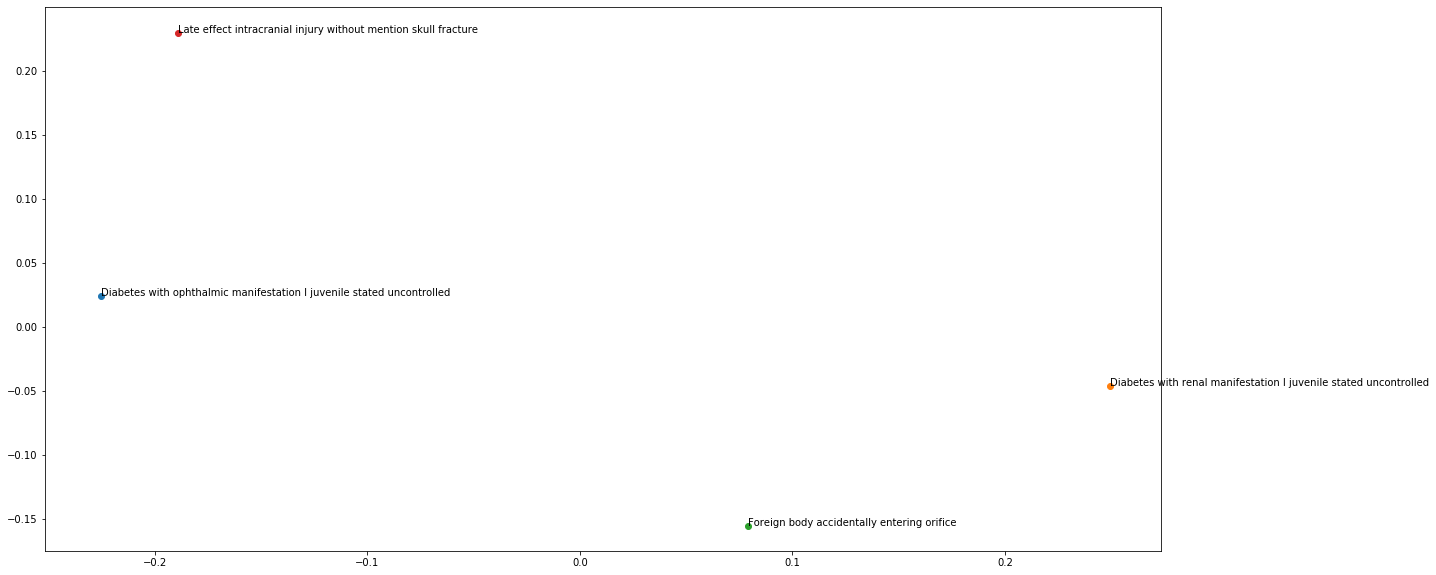

In [67]:
plt.figure(figsize=(20,10))
set_diagnoses = list(set(diagnoses))
embedded_diag = []
for d in [1, 11, 12, 13]:
    plt.scatter(embedder.docvecs[d][0], embedder.docvecs[d][1])
    plt.annotate(set_diagnoses[d], (embedder.docvecs[d][0], embedder.docvecs[d][1]))

In [15]:
X_emb = []
for x in X[:, -3:]:
    t = []
    for i in range(x.size):
        t.append(diff(embedded_diag, embedder.infer_vector(sanitize(x[i]).split())))
    X_emb.append(t)